# Loan Prediction Problem

**Importing the required libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Reading the dataset**

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Understanding the size of the dataset**

In [ ]:
df.shape

(614, 13)

**Identifying Duplicate Records** 

In [ ]:
df.duplicated().sum()

0

**No duplicate values**

**Setting Loan_ID Feature as Index**

In [ ]:
df = df.set_index('Loan_ID')

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df['Credit_History'] = df['Credit_History'].replace(1.0, "Yes")
df['Credit_History'] = df['Credit_History'].replace(0.0, "No")
df['Credit_History'] = df['Credit_History'].astype(object)

**Identifying Null/Missing Values of "NaN" type**

In [ ]:
df.isnull().sum()*100/len(df)

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

**Handling Missing Values in Categorical Features Using Mode**

In [ ]:
df['Gender'] = df['Gender'].replace(np.nan, df['Gender'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].replace(np.nan, df['Self_Employed'].mode()[0])
df['Married'] = df['Married'].replace(np.nan, df['Married'].mode()[0])
df['Credit_History'] = df['Credit_History'].replace(np.nan, df['Credit_History'].mode()[0])

**Handling Missing Values in Numerical Features Using Mean and Mode**

In [ ]:
df['Dependents'] = df['Dependents'].replace(np.nan, df['Dependents'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].replace(np.nan, df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].replace(np.nan, df['Loan_Amount_Term'].mode()[0])

In [ ]:
df.isnull().sum()*100/len(df)

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

**Identifying null values of string format like "???" or "unknown"**

In [ ]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
def dtype_checker(df, column):
  print(df[column].unique())

dtype_checker(df, 'Gender')
dtype_checker(df, 'Married')
dtype_checker(df, 'Dependents')
dtype_checker(df, 'Education')
dtype_checker(df, 'Self_Employed')
dtype_checker(df, 'Credit_History')
dtype_checker(df, 'Property_Area')
dtype_checker(df, 'Loan_Status')

['Male' 'Female']
['No' 'Yes']
['0' '1' '2' '3+']
['Graduate' 'Not Graduate']
['No' 'Yes']
['Yes' 'No']
['Urban' 'Rural' 'Semiurban']
['Y' 'N']


**No String Format Null Values Present**

# Exploratory Data Analysis (EDA)

**Univariate Analysis**

**1. df.describe**


In [ ]:
df.describe() 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423
std,6109.041673,2926.248369,84.037468,64.428629
min,150.000000,0.000000,9.000000,12.000000
25%,2877.500000,0.000000,100.250000,360.000000
50%,3812.500000,1188.500000,129.000000,360.000000
75%,5795.000000,2297.250000,164.750000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


**Analysis:**
1. Majority Applicant Income values lie between 2877 - 5795
2. Majority Co-applicant Income values lie between 0 - 2297
3. Majority Loan Amount values lie between 100 - 164
4. Majority Loan Amount Term values lie between 360 - 360

**2. Stripplot**

<AxesSubplot:ylabel='Loan_Status'>

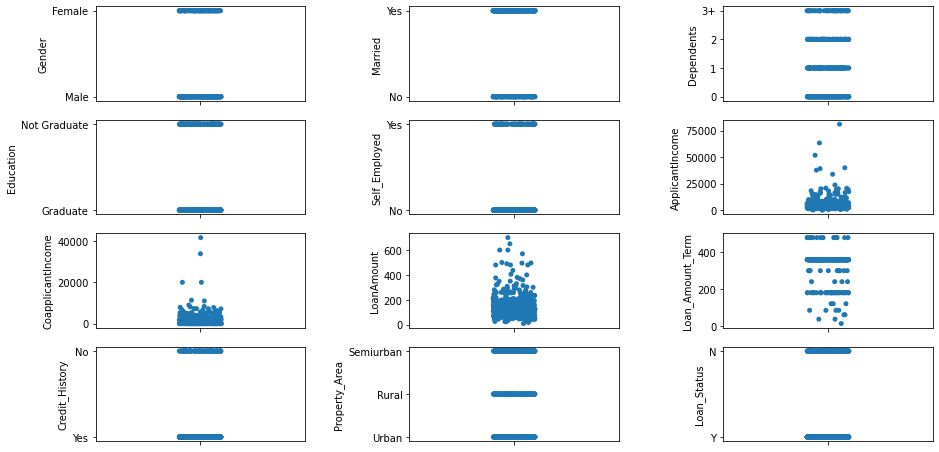

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplots_adjust(wspace=0.5)

plt.subplot(4, 3, 1)
sns.stripplot(y=df['Gender'])

plt.subplot(4, 3, 2)
sns.stripplot(y=df['Married'])

plt.subplot(4, 3, 3)
sns.stripplot(y=df['Dependents'])

plt.subplot(4, 3, 4)
sns.stripplot(y=df['Education'])

plt.subplot(4, 3, 5)
sns.stripplot(y=df['Self_Employed'])

plt.subplot(4, 3, 6)
sns.stripplot(y=df['ApplicantIncome'])

plt.subplot(4, 3, 7)
sns.stripplot(y=df['CoapplicantIncome'])

plt.subplot(4, 3, 8)
sns.stripplot(y=df['LoanAmount'])

plt.subplot(4, 3, 9)
sns.stripplot(y=df['Loan_Amount_Term'])

plt.subplot(4, 3, 10)
sns.stripplot(y=df['Credit_History'])

plt.subplot(4, 3, 11)
sns.stripplot(y=df['Property_Area'])

plt.subplot(4, 3, 12)
sns.stripplot(y=df['Loan_Status'])

**Analysis:**
1. Coapplicant Income, Applicant Income and Loan Amount are highly skewed features as majority of values fall in the same range.
2. Loan Amount Term has more or less equally scattered values. 
3. All other features have ordinal values which are more or less equally distributed.

**3. Histplot**

Text(0, 0.5, 'Count')

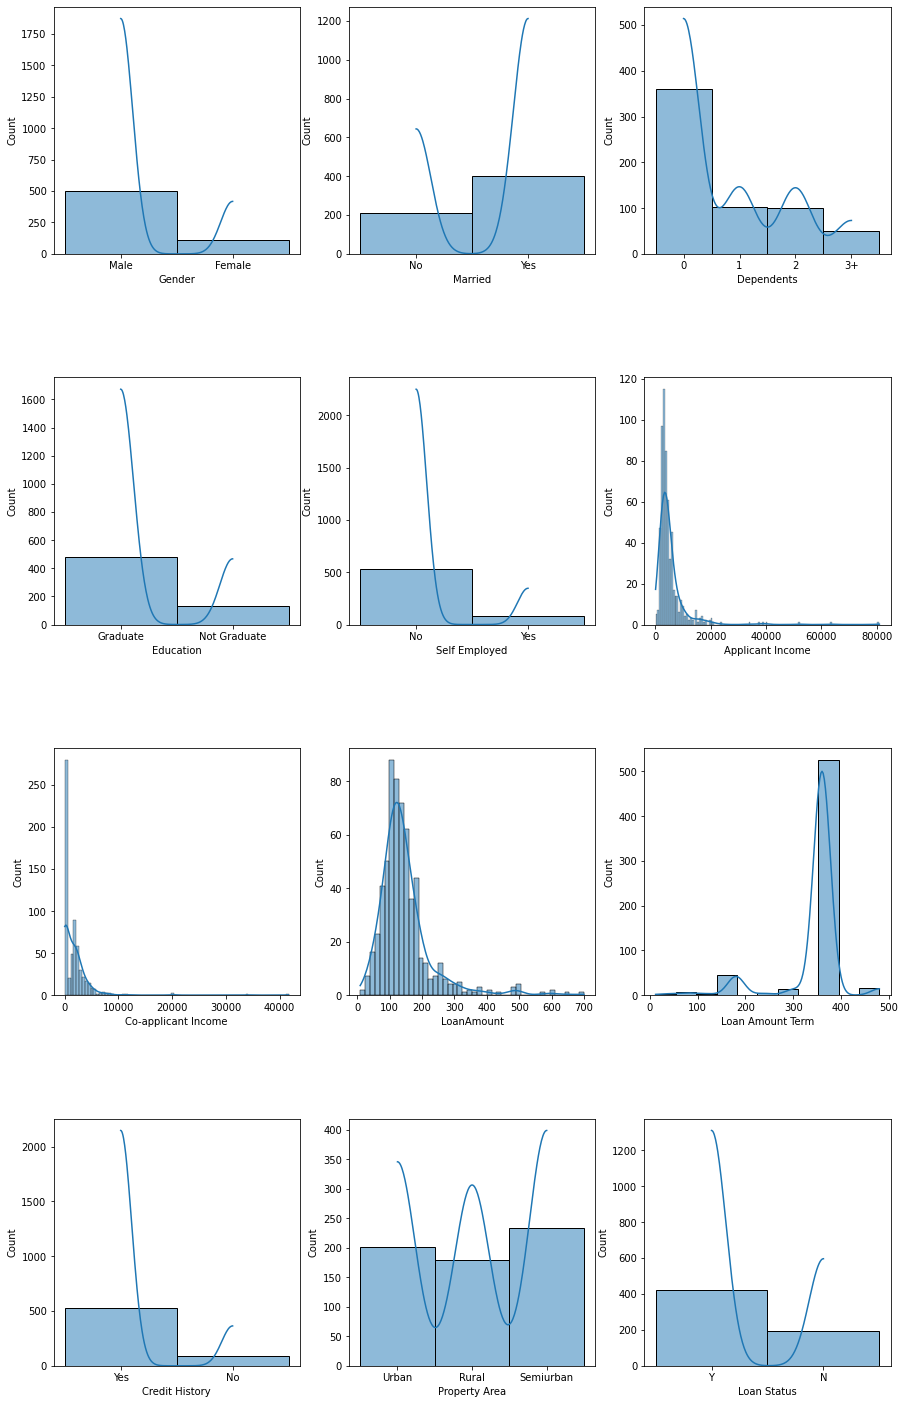

In [ ]:
plt.figure(figsize=(15, 25))
plt.subplots_adjust(hspace=0.5)

plt.subplot(4, 3, 1)
sns.histplot(df['Gender'], kde=True)
plt.xlabel("Gender")
plt.ylabel("Count")

plt.subplot(4, 3, 2)
sns.histplot(df['Married'], kde=True)
plt.xlabel("Married")
plt.ylabel("Count")

plt.subplot(4, 3, 3)
sns.histplot(df['Dependents'], kde=True)
plt.xlabel("Dependents")
plt.ylabel("Count")

plt.subplot(4, 3, 4)
sns.histplot(df['Education'], kde=True)
plt.xlabel("Education")
plt.ylabel("Count")

plt.subplot(4, 3, 5)
sns.histplot(df['Self_Employed'], kde=True)
plt.xlabel("Self Employed")
plt.ylabel("Count")

plt.subplot(4, 3, 6)
sns.histplot(df['ApplicantIncome'], kde=True)
plt.xlabel("Applicant Income")
plt.ylabel("Count")

plt.subplot(4, 3, 7)
sns.histplot(df['CoapplicantIncome'], kde=True)
plt.xlabel("Co-applicant Income")
plt.ylabel("Count")

plt.subplot(4, 3, 8)
sns.histplot(df['LoanAmount'], kde=True)
plt.xlabel("LoanAmount")
plt.ylabel("Count")

plt.subplot(4, 3, 9)
sns.histplot(df['Loan_Amount_Term'], kde=True)
plt.xlabel("Loan Amount Term")
plt.ylabel("Count")

plt.subplot(4, 3, 10)
sns.histplot(df['Credit_History'], kde=True)
plt.xlabel("Credit History")
plt.ylabel("Count")

plt.subplot(4, 3, 11)
sns.histplot(df['Property_Area'], kde=True)
plt.xlabel("Property Area")
plt.ylabel("Count")

plt.subplot(4, 3, 12)
sns.histplot(df['Loan_Status'], kde=True)
plt.xlabel("Loan Status")
plt.ylabel("Count")

**Analysis:**
1. More Males have applied for loan.
2. More Married people have applied for loan.
3. Majority loan applicants have 0 dependents.
4. More Graduated people have applied for loan.
5. Less Self-Employed people have applied for the loan.
6. Majority applicants have income between 0 - 10000. The ApplicantIncome Feature is positively skewed.
7. Majority coapplicants have income between 0 - 2500. The CoapplicantIncome Feature is positively skewed.
8. Loan amount is 1,30,000 in majority cases. Loan Amount feature is positively skewed.
9. Loan amount term is approx 1 year or 360 days and is negatively skewed.
10. Majority of the applicants have good credit history where they have successfully returned the loan amount.
11.  A good mix of rural, urban and semiurban collateral property areas have been considered for loan application.
12. Majority of the loan applications have been approved.

Text(0.5, 1.0, 'Loan Status')

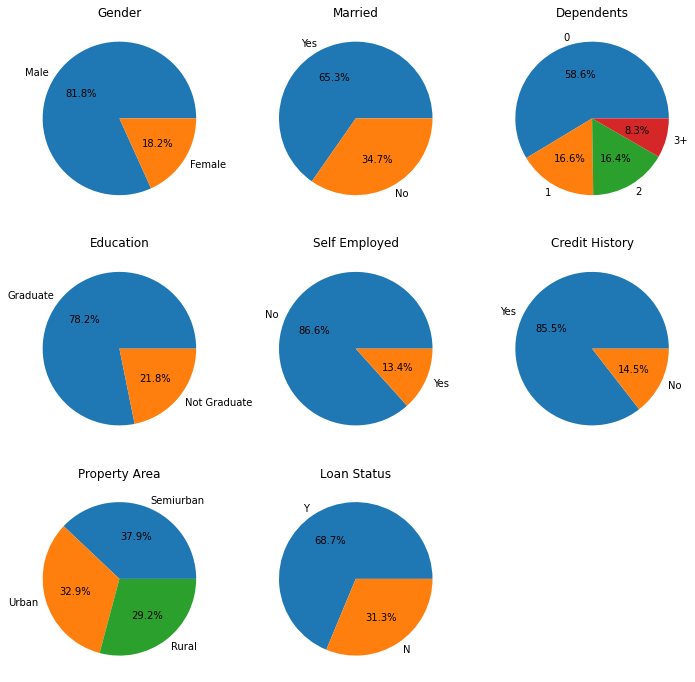

In [ ]:
plt.figure(figsize=(12, 12))

plt.subplot(3, 3, 1)
x = df['Gender'].value_counts()
plt.pie(x.values,
        labels=x.index,
        autopct='%1.1f%%')
plt.title("Gender")

plt.subplot(3, 3, 2)
x = df['Married'].value_counts()
plt.pie(x.values,
        labels=x.index,
        autopct='%1.1f%%')
plt.title("Married")

plt.subplot(3, 3, 3)
x = df['Dependents'].value_counts()
plt.pie(x.values,
        labels=x.index,
        autopct='%1.1f%%')
plt.title("Dependents")

plt.subplot(3, 3, 4)
x = df['Education'].value_counts()
plt.pie(x.values,
        labels=x.index,
        autopct='%1.1f%%')
plt.title("Education")

plt.subplot(3, 3, 5)
x = df['Self_Employed'].value_counts()
plt.pie(x.values,
        labels=x.index,
        autopct='%1.1f%%')
plt.title("Self Employed")

plt.subplot(3, 3, 6)
x = df['Credit_History'].value_counts()
plt.pie(x.values,
        labels=x.index,
        autopct='%1.1f%%')
plt.title("Credit History")

plt.subplot(3, 3, 7)
x = df['Property_Area'].value_counts()
plt.pie(x.values,
        labels=x.index,
        autopct='%1.1f%%')
plt.title("Property Area")

plt.subplot(3, 3, 8)
x = df['Loan_Status'].value_counts()
plt.pie(x.values,
        labels=x.index,
        autopct='%1.1f%%')
plt.title("Loan Status")

**Analysis:**
1. 81.8% of total loan applications are males.
2. 65.3% of total loan applications are married.
3. 58.6% of total loan applicants have 0 dependents.
4. 78.2% of total loan applicants are graduate.
5. 86.6% of total loan applicants are not self-employed.
6. 85.5% of total loan applicants have a positive credit history.
7. 32.9% collateral property are urban, 37.9% are semiurban and 29.2% are rural.
8. 68.7% of total loan applications have been approved.

**Bivariate Analysis:**

**1. Heatmap:**

<AxesSubplot:>

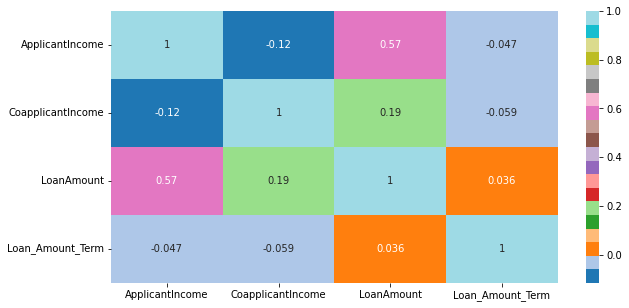

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), cmap="tab20", annot=True)

**Analysis:**
The numerical attributes do not have a very good correlation with each other except Loan Amount and Applicant Income with a positive correlation of 0.57

**2. Scatterplot:**

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

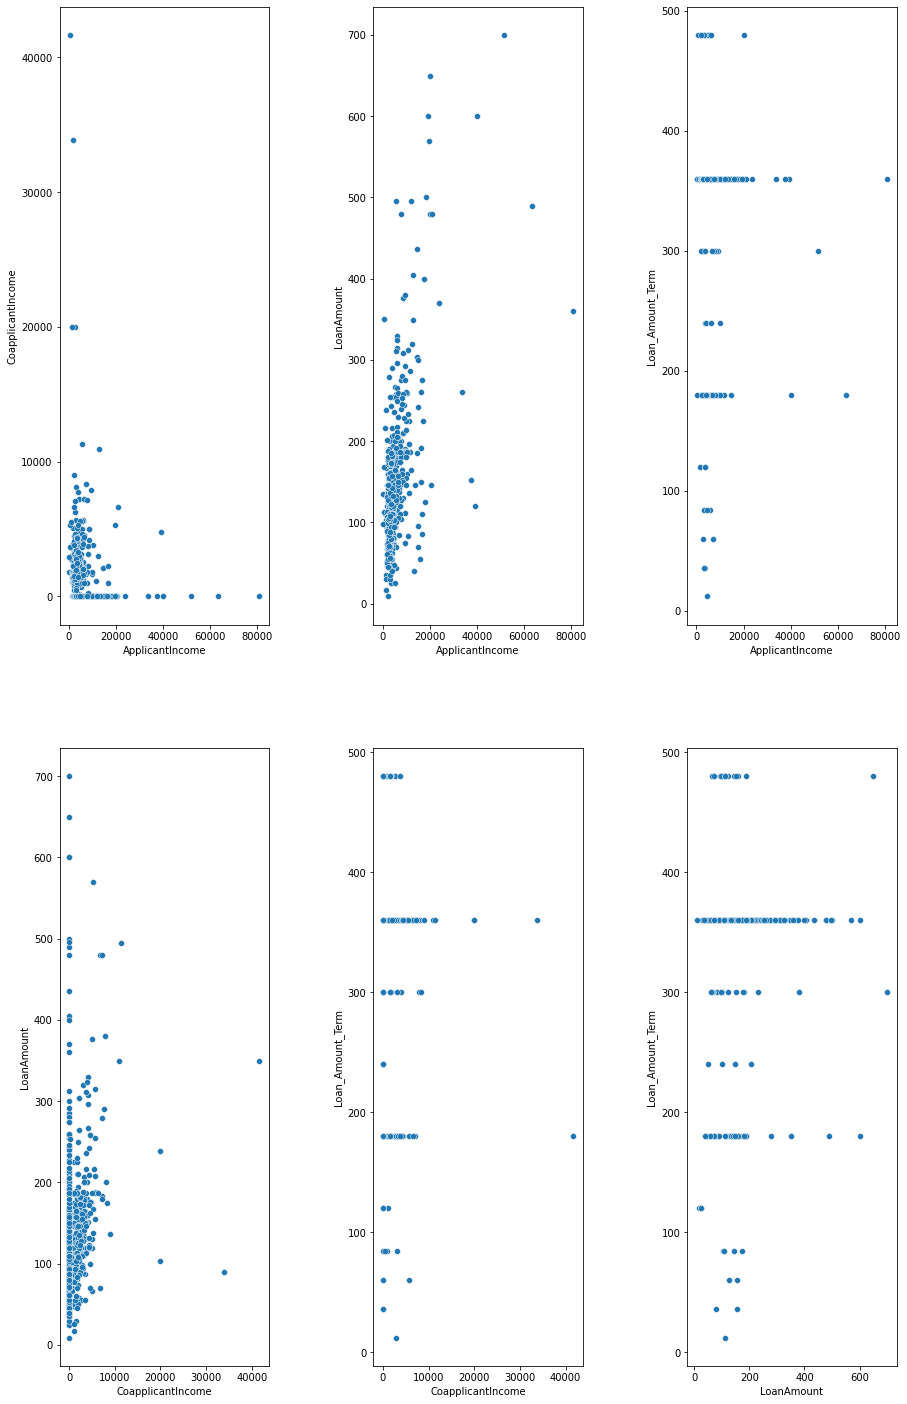

In [ ]:
plt.figure(figsize=(15, 25))
plt.subplots_adjust(wspace=0.5)

plt.subplot(2, 3, 1)
sns.scatterplot(x = df['ApplicantIncome'], y = df['CoapplicantIncome'], data=df)

plt.subplot(2, 3, 2)
sns.scatterplot(x = df['ApplicantIncome'], y = df['LoanAmount'], data=df)

plt.subplot(2, 3, 3)
sns.scatterplot(x = df['ApplicantIncome'], y = df['Loan_Amount_Term'], data=df)

plt.subplot(2, 3, 4)
sns.scatterplot(x = df['CoapplicantIncome'], y = df['LoanAmount'], data=df)

plt.subplot(2, 3, 5)
sns.scatterplot(x = df['CoapplicantIncome'], y = df['Loan_Amount_Term'], data=df)

plt.subplot(2, 3, 6)
sns.scatterplot(x = df['LoanAmount'], y = df['Loan_Amount_Term'], data=df)

**Analysis:**
There is no such correlation between the above features.

**3. KDE Plot:**


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

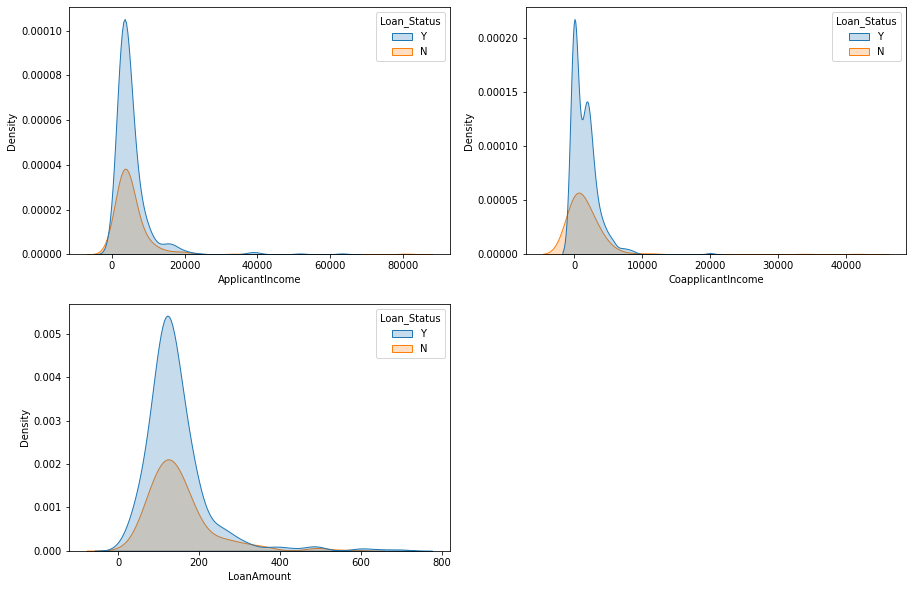

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.kdeplot(data=df, x='ApplicantIncome', hue='Loan_Status', fill=True)

plt.subplot(2, 2, 2)
sns.kdeplot(data=df, x='CoapplicantIncome', hue='Loan_Status', fill=True)

plt.subplot(2, 2, 3)
sns.kdeplot(data=df, x='LoanAmount', hue='Loan_Status', fill=True)

**Analysis:**
None of the above features have a great role in determining the approval of loan.

**4. Count Plot:**


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

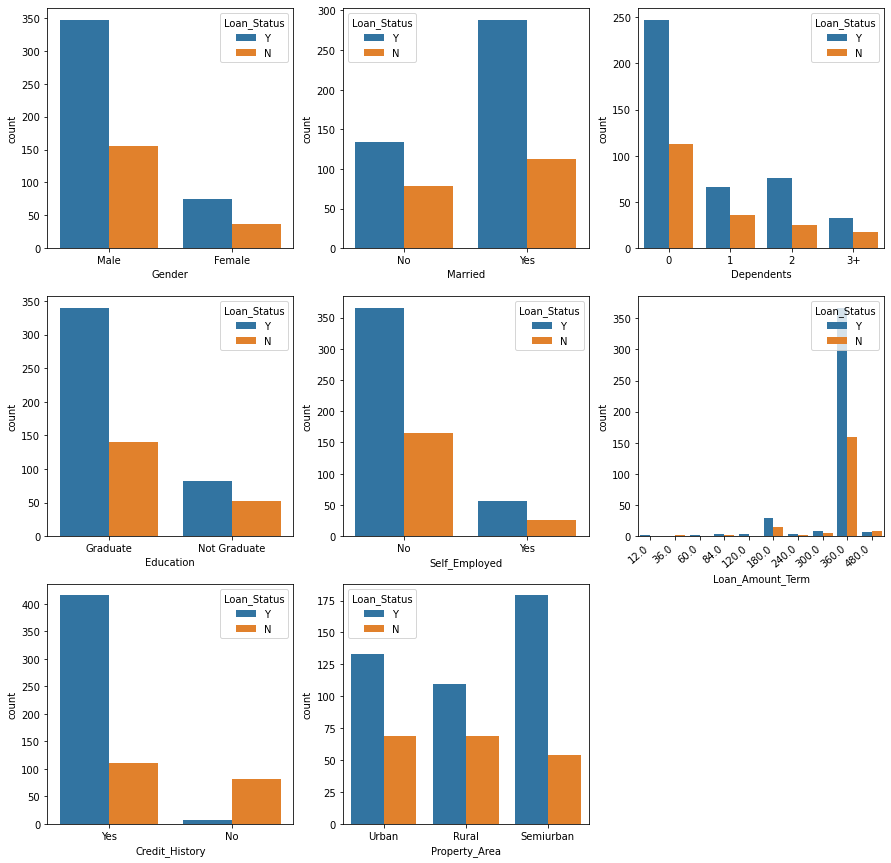

In [ ]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 3, 1)
sns.countplot(x=df['Gender'], hue=df['Loan_Status'])
# plt.legend(loc="upper right")

plt.subplot(3, 3, 2)
sns.countplot(x=df['Married'], hue=df['Loan_Status'])

plt.subplot(3, 3, 3)
sns.countplot(x=df['Dependents'], hue=df['Loan_Status'])

plt.subplot(3, 3, 4)
sns.countplot(x=df['Education'], hue=df['Loan_Status'])

plt.subplot(3, 3, 5)
sns.countplot(x=df['Self_Employed'], hue=df['Loan_Status'])

plt.subplot(3, 3, 6)
ax = sns.countplot(x=df['Loan_Amount_Term'], hue=df['Loan_Status'])
ax.set_xticklabels(ax.get_xticklabels(), ha='right', rotation=40)

plt.subplot(3, 3, 7)
sns.countplot(x=df['Credit_History'], hue=df['Loan_Status'])

plt.subplot(3, 3, 8)
sns.countplot(x=df['Property_Area'], hue=df['Loan_Status'])

**Analysis:**
The count plot gives us an idea of how many of the feature values contributed to the loan getting approved and how many contributed to loan getting disapproved.

**Count Plot:**

<AxesSubplot:xlabel='Gender', ylabel='count'>

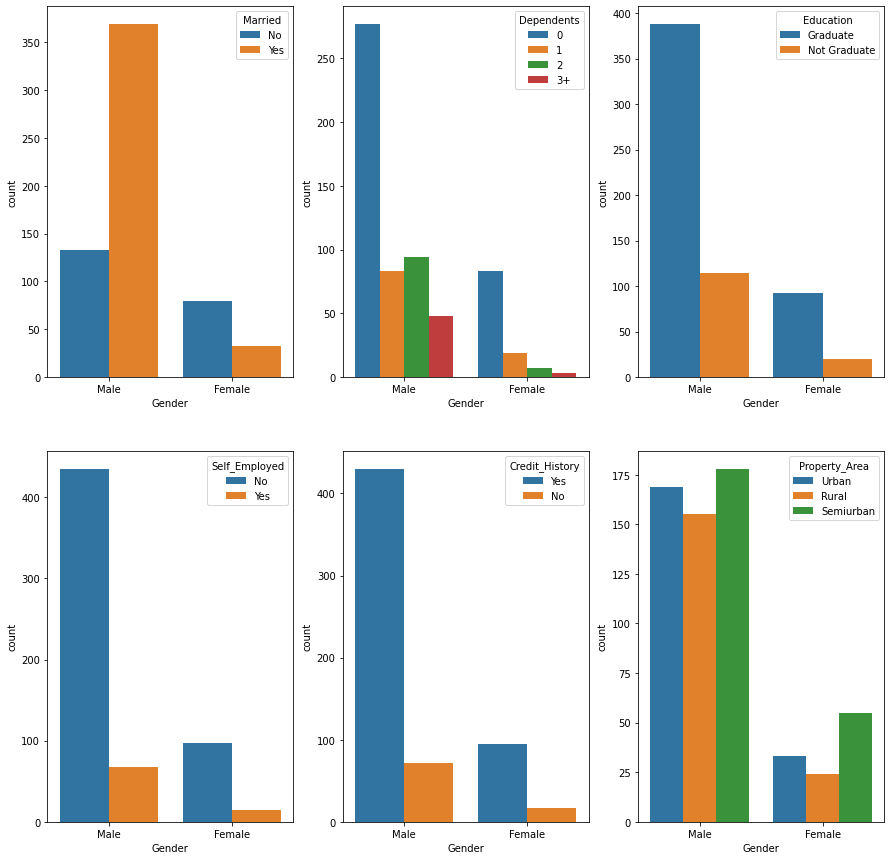

In [ ]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 3, 1)
sns.countplot(x=df['Gender'], hue=df['Married'])

plt.subplot(2, 3, 2)
sns.countplot(x=df['Gender'], hue=df['Dependents'])

plt.subplot(2, 3, 3)
sns.countplot(x=df['Gender'], hue=df['Education'])

plt.subplot(2, 3, 4)
sns.countplot(x=df['Gender'], hue=df['Self_Employed'])

plt.subplot(2, 3, 5)
sns.countplot(x=df['Gender'], hue=df['Credit_History'])

plt.subplot(2, 3, 6)
sns.countplot(x=df['Gender'], hue=df['Property_Area'])

**Analysis:**
We can analyze the distribution of values between each and every categorical feature with each other.

**Multivariate Analysis:**

**1. Pair Plot:**

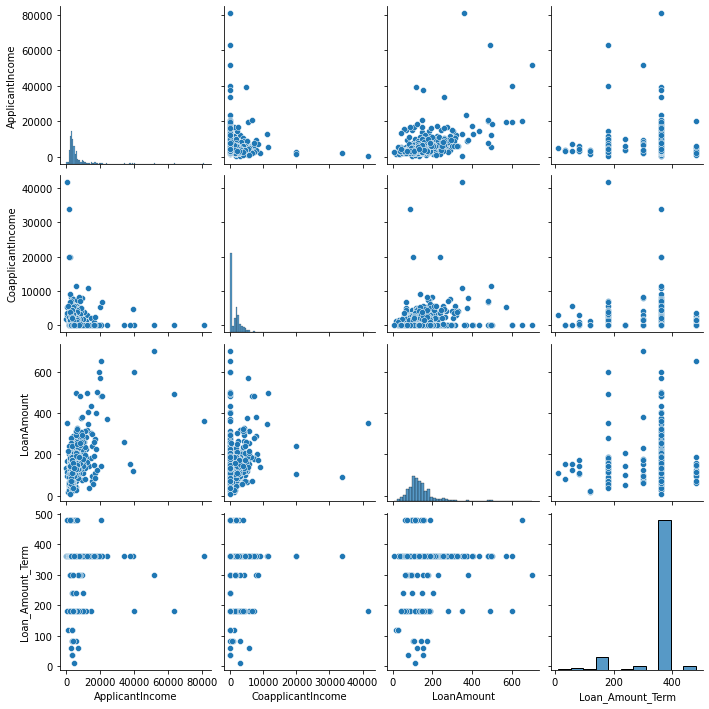

In [ ]:
sns.pairplot(df)

**Analysis:**
The pair plot gives a complete picture of all the features.

**Outlier Identification**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

<AxesSubplot:xlabel='Loan_Amount_Term'>

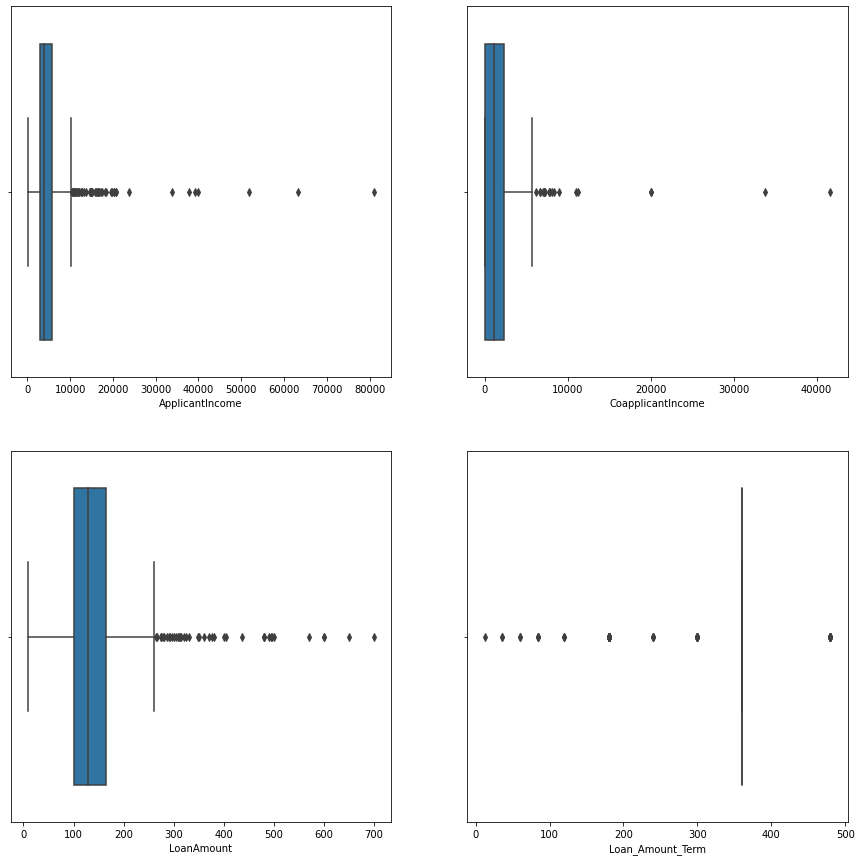

In [ ]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
sns.boxplot(df['ApplicantIncome'])

plt.subplot(2, 2, 2)
sns.boxplot(df['CoapplicantIncome'])

plt.subplot(2, 2, 3)
sns.boxplot(df['LoanAmount'])

plt.subplot(2, 2, 4)
sns.boxplot(df['Loan_Amount_Term'])

**Outlier Handling**

In [ ]:
def outlier_handler(df, column):
  q1, q3 = np.percentile(df[column], [25, 75])
  iqr = q3 - q1;
  lb = q1 - iqr*1.5
  ub = q3 + iqr*1.5

  df.loc[df[column]>ub, column] = ub
  df.loc[df[column]<lb, column] = lb

**Replacing Upper Bound Outliers with Upper Bound Value**

**Replacing Lower Bound Outliers with Lower Bound Value**

In [ ]:
outlier_handler(df, 'ApplicantIncome')
outlier_handler(df, 'CoapplicantIncome')
outlier_handler(df, 'LoanAmount')
outlier_handler(df, 'Loan_Amount_Term')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

<AxesSubplot:xlabel='Loan_Amount_Term'>

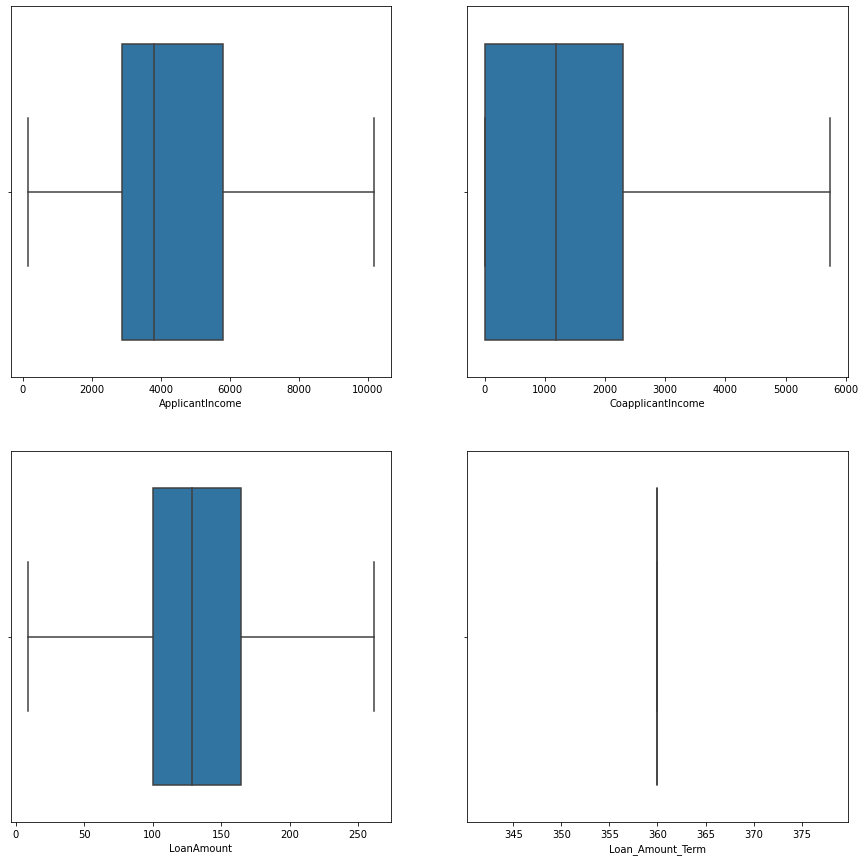

In [ ]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
sns.boxplot(df['ApplicantIncome'])

plt.subplot(2, 2, 2)
sns.boxplot(df['CoapplicantIncome'])

plt.subplot(2, 2, 3)
sns.boxplot(df['LoanAmount'])

plt.subplot(2, 2, 4)
sns.boxplot(df['Loan_Amount_Term'])

**Outliers Handled**

**Encoding - Label Encoding**

In [ ]:
# dummies = pd.get_dummies(df)
# dummies.head()

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Married']= label_encoder.fit_transform(df['Married'])
df['Dependents']= label_encoder.fit_transform(df['Dependents'])
df['Education']= label_encoder.fit_transform(df['Education'])
df['Self_Employed']= label_encoder.fit_transform(df['Self_Employed'])
df['Credit_History']= label_encoder.fit_transform(df['Credit_History'])
df['Education']= label_encoder.fit_transform(df['Education'])
df['Property_Area']= label_encoder.fit_transform(df['Property_Area'])
df['Loan_Status']= label_encoder.fit_transform(df['Loan_Status'])

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0,0,0,5849.0,0.0,146.412162,360.0,1,2,1
LP001003,1,1,1,0,0,4583.0,1508.0,128.000000,360.0,1,0,0
LP001005,1,1,0,0,1,3000.0,0.0,66.000000,360.0,1,2,1
LP001006,1,1,0,1,0,2583.0,2358.0,120.000000,360.0,1,2,1
LP001008,1,0,0,0,0,6000.0,0.0,141.000000,360.0,1,2,1


**Splitting of Data into Contributing Factors and Target Variable**

In [ ]:
x = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [ ]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001002,1,0,0,0,0,5849.0,0.0,146.412162,360.0,1,2
LP001003,1,1,1,0,0,4583.0,1508.0,128.000000,360.0,1,0
LP001005,1,1,0,0,1,3000.0,0.0,66.000000,360.0,1,2
LP001006,1,1,0,1,0,2583.0,2358.0,120.000000,360.0,1,2
LP001008,1,0,0,0,0,6000.0,0.0,141.000000,360.0,1,2


In [ ]:
y.head()

Loan_ID
LP001002    1
LP001003    0
LP001005    1
LP001006    1
LP001008    1
Name: Loan_Status, dtype: int64

**Normalization**

In [ ]:
#Decimal Scaling Normalization of Contributing Factors (x)

x_decimal_scaled = x.copy()
for column in x_decimal_scaled.columns:
  max_b = str(int(x_decimal_scaled[column].max()))
  x_decimal_scaled[column] = x_decimal_scaled[column]/(10**len(max_b))

x_decimal_scaled

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001002,0.1,0.0,0.0,0.0,0.0,0.05849,0.0000,0.146412,0.36,0.1,0.2
LP001003,0.1,0.1,0.1,0.0,0.0,0.04583,0.1508,0.128000,0.36,0.1,0.0
LP001005,0.1,0.1,0.0,0.0,0.1,0.03000,0.0000,0.066000,0.36,0.1,0.2
LP001006,0.1,0.1,0.0,0.1,0.0,0.02583,0.2358,0.120000,0.36,0.1,0.2
LP001008,0.1,0.0,0.0,0.0,0.0,0.06000,0.0000,0.141000,0.36,0.1,0.2
...,...,...,...,...,...,...,...,...,...,...,...
LP002978,0.0,0.0,0.0,0.0,0.0,0.02900,0.0000,0.071000,0.36,0.1,0.0
LP002979,0.1,0.1,0.3,0.0,0.0,0.04106,0.0000,0.040000,0.36,0.1,0.0
LP002983,0.1,0.1,0.1,0.0,0.0,0.08072,0.0240,0.253000,0.36,0.1,0.2


In [ ]:
#Decimal Scaling Normalization of Target Variable (y)
y_decimal_scaled = y.copy()
max_b = str(int(y_decimal_scaled.max()))
y_decimal_scaled = y_decimal_scaled/(10**len(max_b))

y_decimal_scaled

Loan_ID
LP001002    0.1
LP001003    0.0
LP001005    0.1
LP001006    0.1
LP001008    0.1
           ... 
LP002978    0.1
LP002979    0.1
LP002983    0.1
LP002984    0.1
LP002990    0.0
Name: Loan_Status, Length: 614, dtype: float64

In [ ]:
# # Min-Max Scaling of Contributing Factors (x)

# x_max_scaled = x.copy()

# for column in x_max_scaled.columns:
# x_max_scaled[column] = x_max_scaled[column] / x_max_scaled[column].abs().max()

# x_max_scaled

In [ ]:
# # Min-Max Scaling of Target Variable (y)

# y_max_scaled = y.copy()

# y_max_scaled = y_max_scaled / y_max_scaled.abs().max()

# y_max_scaled

In [ ]:
# #Z-Score Normalization of Contributing Factors (x)

# x_z_scaled = x.copy()

# for column in x_z_scaled.columns:
#     x_z_scaled[column] = (x_z_scaled[column] -
#                            x_z_scaled[column].mean()) / x_z_scaled[column].std()    

# x_z_scaled

In [ ]:
# #Z-Score Normalization of Target Variable (y)

# y_z_scaled = y.copy()

#     y_z_scaled = (y_z_scaled -
#                            y_z_scaled.mean()) / y_z_scaled.std()    

# y_z_scaled

#Model Building

**Logistic Regression**

**Model Evaluation Metrics: Accuracy, Precision and Recall**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, confusion_matrix
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x, y)
y_pred = model.predict(x)

#Accuracy
accuracy_lr = accuracy_score(y, y_pred)
print("Accuracy: ", accuracy_lr*100, "%")

#Confusion Matrix
print(confusion_matrix(y, y_pred))

#Precision, Recall and F-Score
print(classification_report(y, y_pred))

Accuracy:  80.94462540716613 %
[[ 82 110]
 [  7 415]]
              precision    recall  f1-score   support

           0       0.92      0.43      0.58       192
           1       0.79      0.98      0.88       422

    accuracy                           0.81       614
   macro avg       0.86      0.71      0.73       614
weighted avg       0.83      0.81      0.78       614



**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x, y)
y_pred = nb.predict(x)

#Accuracy
accuracy_nb = accuracy_score(y, y_pred)
print("Accuracy: ", accuracy_nb*100, "%")

#Confusion Matrix
print(confusion_matrix(y, y_pred))

#Precision, Recall and F-Score
print(classification_report(y, y_pred))

Accuracy:  80.94462540716613 %
[[ 82 110]
 [  7 415]]
              precision    recall  f1-score   support

           0       0.92      0.43      0.58       192
           1       0.79      0.98      0.88       422

    accuracy                           0.81       614
   macro avg       0.86      0.71      0.73       614
weighted avg       0.83      0.81      0.78       614



**SVM Classifier**

In [ ]:
# #Support Vector Machine Classifier Model

# from sklearn.svm import SVC  
# sv = SVC(kernel='linear') 
# sv.fit(x, y)
# y_pred = sv.predict(x) 

# #Accuracy
# accuracy_sv = accuracy_score(y, y_pred)
# print("Accuracy: ", accuracy_sv*100, "%")

# #Confusion Matrix
# print(confusion_matrix(y, y_pred))

# #Precision, Recall and F-Score
# print(classification_report(y, y_pred))

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x, y)
y_pred = dt.predict(x)

#Accuracy
accuracy_dt = accuracy_score(y, y_pred)
print("Accuracy: ", accuracy_dt*100, "%")

#Confusion Matrix
print(confusion_matrix(y, y_pred))

#Precision, Recall and F-Score
print(classification_report(y, y_pred))

Accuracy:  99.8371335504886 %
[[192   0]
 [  1 421]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       192
           1       1.00      1.00      1.00       422

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=150)
rf.fit(x, y)
y_pred = rf.predict(x)

#Accuracy
accuracy_rf = accuracy_score(y, y_pred)
print("Accuracy: ", accuracy_rf*100, "%")

#Confusion Matrix
print(confusion_matrix(y, y_pred))

#Precision, Recall and F-Score
print(classification_report(y, y_pred))

Accuracy:  99.8371335504886 %
[[191   1]
 [  0 422]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       192
           1       1.00      1.00      1.00       422

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



**KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier(n_neighbors=8, metric='manhattan', weights='distance')
knnc.fit(x, y)
y_pred = knnc.predict(x)

#Accuracy
accuracy_knnc = accuracy_score(y, y_pred)
print("Accuracy: ", accuracy_knnc*100, "%")

#Confusion Matrix
print(confusion_matrix(y, y_pred))

#Precision, Recall and F-Score
print(classification_report(y, y_pred))

Accuracy:  99.8371335504886 %
[[192   0]
 [  1 421]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       192
           1       1.00      1.00      1.00       422

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



**XGBoost Classifier**

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x, y)
y_pred = xgb.predict(x)

#Accuracy
accuracy_xg = accuracy_score(y, y_pred)
print("Accuracy: ", accuracy_xg*100, "%")

#Confusion Matrix
print(confusion_matrix(y, y_pred))

#Precision, Recall and F-Score
print(classification_report(y, y_pred))

Accuracy:  99.8371335504886 %
[[191   1]
 [  0 422]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       192
           1       1.00      1.00      1.00       422

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



** Tuned XGBoost Classifier**

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth=15, learning_rate=0.1, n_estimators=1000)
xgb.fit(x, y)
y_pred = xgb.predict(x)

#Accuracy
accuracy_xg = accuracy_score(y, y_pred)
print("Accuracy: ", accuracy_xg*100, "%")

#Confusion Matrix
print(confusion_matrix(y, y_pred))

#Precision, Recall and F-Score
print(classification_report(y, y_pred))

Accuracy:  99.8371335504886 %
[[191   1]
 [  0 422]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       192
           1       1.00      1.00      1.00       422

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



**LGBM Classifier**

In [ ]:
import lightgbm as lgb
lgclf = lgb.LGBMClassifier()
lgclf.fit(x, y)
y_pred=lgclf.predict(x)

#Accuracy
accuracy_lg = accuracy_score(y, y_pred)
print("Accuracy: ", accuracy_lg*100, "%")

#Confusion Matrix
print(confusion_matrix(y, y_pred))

#Precision, Recall and F-Score
print(classification_report(y, y_pred))

Accuracy:  98.8599348534202 %
[[186   6]
 [  1 421]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       192
           1       0.99      1.00      0.99       422

    accuracy                           0.99       614
   macro avg       0.99      0.98      0.99       614
weighted avg       0.99      0.99      0.99       614



**Tuned LGBM Classifier**

In [ ]:
import lightgbm as lgb
lgclf = lgb.LGBMClassifier(n_estimators=1800, learning_rate=0.3)
lgclf.fit(x, y)
y_pred=lgclf.predict(x)

#Accuracy
accuracy_lg = accuracy_score(y, y_pred)
print("Accuracy: ", accuracy_lg*100, "%")

#Confusion Matrix
print(confusion_matrix(y, y_pred))

#Precision, Recall and F-Score
print(classification_report(y, y_pred))

Accuracy:  99.8371335504886 %
[[191   1]
 [  0 422]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       192
           1       1.00      1.00      1.00       422

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



**Prediction on Test Data**

**Importing Test Data**

In [ ]:
df_test = pd.read_csv("test.csv")

In [ ]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


**Understanding Data Size**

In [ ]:
df_test.shape

(367, 12)

**Setting Loan_ID as Index** 

In [ ]:
df_test = df_test.set_index("Loan_ID")

In [ ]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
df_test['Credit_History'] = df_test['Credit_History'].replace(1.0, "Yes")
df_test['Credit_History'] = df_test['Credit_History'].replace(0.0, "No")
df_test['Credit_History'] = df_test['Credit_History'].astype(object)

In [ ]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,Yes,Urban
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,Yes,Urban
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,Yes,Urban
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,Yes,Urban


**Checking for Missing Values of NaN type**

In [ ]:
df_test.isnull().sum()*100/len(df_test)

Gender               2.997275
Married              0.000000
Dependents           2.724796
Education            0.000000
Self_Employed        6.267030
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       7.901907
Property_Area        0.000000
dtype: float64

**Handling Missing Values**

In [ ]:
df_test['Gender'] = df_test['Gender'].replace(np.nan, df_test['Gender'].mode()[0])
df_test['Self_Employed'] = df_test['Self_Employed'].replace(np.nan, df_test['Self_Employed'].mode()[0])
df_test['Credit_History'] = df_test['Credit_History'].replace(np.nan, df_test['Credit_History'].mode()[0])

df_test['Dependents'] = df_test['Dependents'].replace(np.nan, df_test['Dependents'].mode()[0])
df_test['LoanAmount'] = df_test['LoanAmount'].replace(np.nan, df_test['LoanAmount'].mean())
df_test['Loan_Amount_Term'] = df_test['Loan_Amount_Term'].replace(np.nan, df_test['Loan_Amount_Term'].mode()[0])

**Checking for Missing Values of String Type**

In [ ]:
df_test.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
dtype: object

In [ ]:
def dtype_checker(df, column):
  print(df[column].unique())

dtype_checker(df_test, 'Gender')
dtype_checker(df_test, 'Married')
dtype_checker(df_test, 'Dependents')
dtype_checker(df_test, 'Education')
dtype_checker(df_test, 'Self_Employed')
dtype_checker(df_test, 'Credit_History')
dtype_checker(df_test, 'Property_Area')

['Male' 'Female']
['Yes' 'No']
['0' '1' '2' '3+']
['Graduate' 'Not Graduate']
['No' 'Yes']
['Yes' 'No']
['Urban' 'Semiurban' 'Rural']


**No Missing Values of String Type**

**Outlier Identification**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

<AxesSubplot:xlabel='Loan_Amount_Term'>

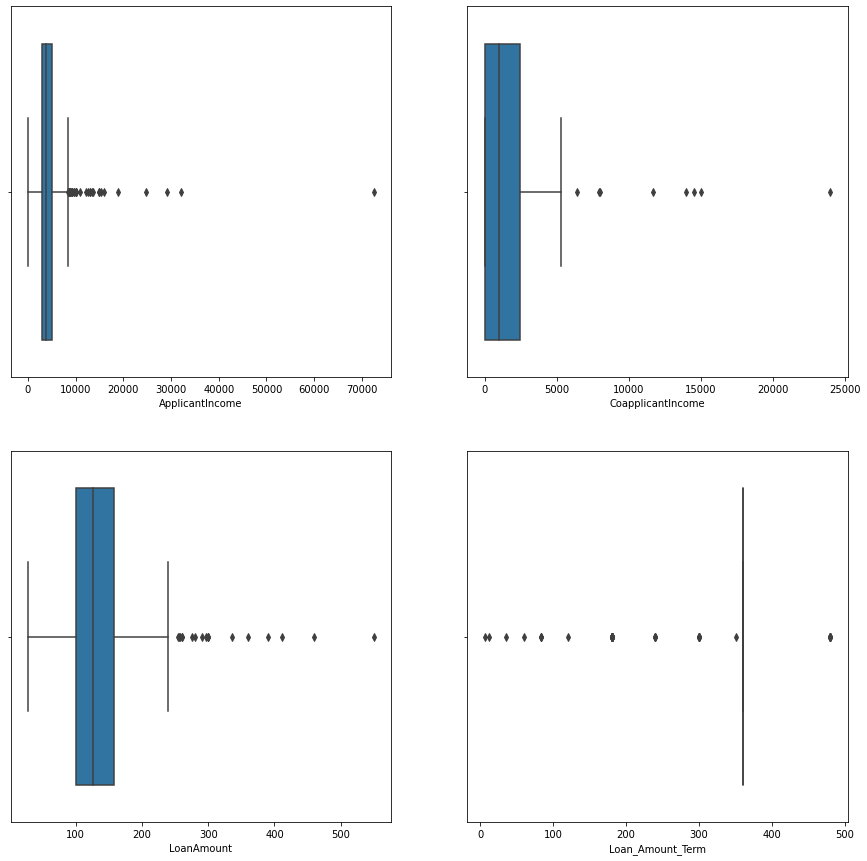

In [ ]:
plt.figure(figsize=(15, 15))


plt.subplot(2, 2, 1)
sns.boxplot(df_test['ApplicantIncome'])


plt.subplot(2, 2, 2)
sns.boxplot(df_test['CoapplicantIncome'])


plt.subplot(2, 2, 3)
sns.boxplot(df_test['LoanAmount'])


plt.subplot(2, 2, 4)
sns.boxplot(df_test['Loan_Amount_Term'])


In [ ]:
def outlier_handler(df, column):
  q1, q3 = np.percentile(df[column], [25, 75])
  iqr = q3 - q1;
  lb = q1 - iqr*1.5
  ub = q3 + iqr*1.5


  df.loc[df[column]>ub, column] = ub
  df.loc[df[column]<lb, column] = lb




outlier_handler(df_test, 'ApplicantIncome')
outlier_handler(df_test, 'CoapplicantIncome')
outlier_handler(df_test, 'LoanAmount')
outlier_handler(df_test, 'Loan_Amount_Term')


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

<AxesSubplot:xlabel='Loan_Amount_Term'>

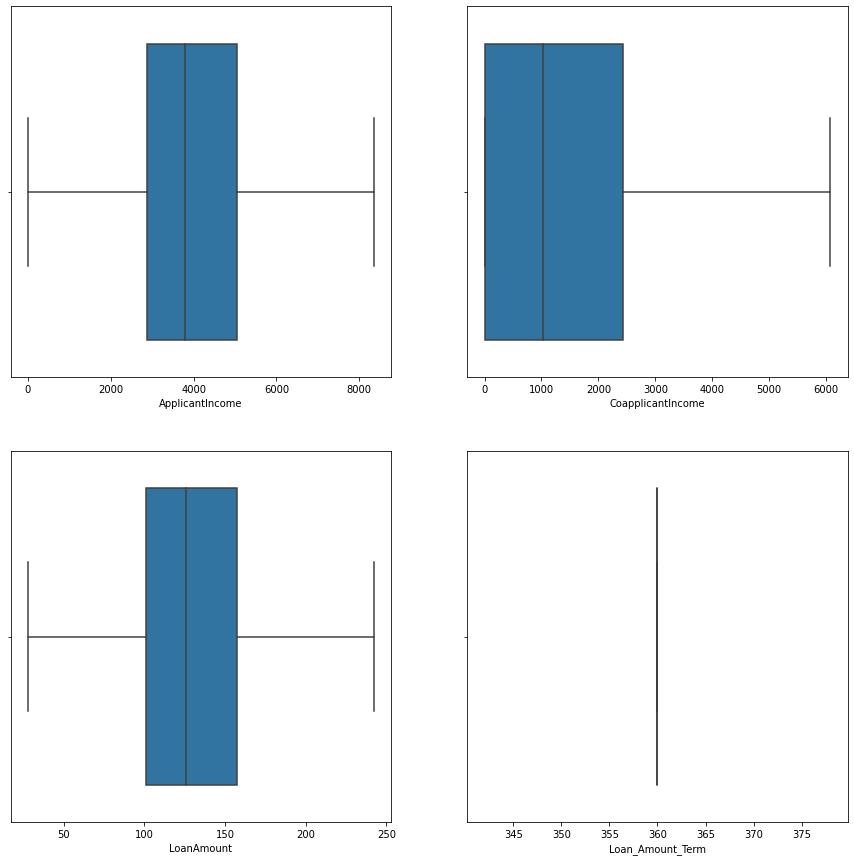

In [ ]:
plt.figure(figsize=(15, 15))


plt.subplot(2, 2, 1)
sns.boxplot(df_test['ApplicantIncome'])


plt.subplot(2, 2, 2)
sns.boxplot(df_test['CoapplicantIncome'])


plt.subplot(2, 2, 3)
sns.boxplot(df_test['LoanAmount'])


plt.subplot(2, 2, 4)
sns.boxplot(df_test['Loan_Amount_Term'])


**Outliers Handled**

**Encoding**

**Label Encoding**

In [ ]:
# Import label encoder
from sklearn import preprocessing


# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

df_copy = df_test.copy()

# Encode labels in column 'species'.
df_copy['Gender']= label_encoder.fit_transform(df_copy['Gender'])
df_copy['Married']= label_encoder.fit_transform(df_copy['Married'])
df_copy['Dependents']= label_encoder.fit_transform(df_copy['Dependents'])
df_copy['Education']= label_encoder.fit_transform(df_copy['Education'])
df_copy['Self_Employed']= label_encoder.fit_transform(df_copy['Self_Employed'])
df_copy['Credit_History']= label_encoder.fit_transform(df_copy['Credit_History'])
df_copy['Education']= label_encoder.fit_transform(df_copy['Education'])
df_copy['Property_Area']= label_encoder.fit_transform(df_copy['Property_Area'])

**Normalization**

In [ ]:
x_decimal_scaled = df_copy.copy()
for column in x_decimal_scaled.columns:
  max_b = str(int(x_decimal_scaled[column].max()))
  x_decimal_scaled[column] = x_decimal_scaled[column]/(10**len(max_b))


x_decimal_scaled

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,0.1,0.1,0.0,0.0,0.0,0.5720,0.0000,0.110,0.36,0.1,0.2
LP001022,0.1,0.1,0.1,0.0,0.0,0.3076,0.1500,0.126,0.36,0.1,0.2
LP001031,0.1,0.1,0.2,0.0,0.0,0.5000,0.1800,0.208,0.36,0.1,0.2
LP001035,0.1,0.1,0.2,0.0,0.0,0.2340,0.2546,0.100,0.36,0.1,0.2
LP001051,0.1,0.0,0.0,0.1,0.0,0.3276,0.0000,0.078,0.36,0.1,0.2
...,...,...,...,...,...,...,...,...,...,...,...
LP002971,0.1,0.1,0.3,0.1,0.1,0.4009,0.1777,0.113,0.36,0.1,0.2
LP002975,0.1,0.1,0.0,0.0,0.0,0.4158,0.0709,0.115,0.36,0.1,0.2
LP002980,0.1,0.0,0.0,0.0,0.0,0.3250,0.1993,0.126,0.36,0.1,0.1


**Model Building**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=150)
rf.fit(x, y)
pred_output = rf.predict(df_copy)

df_copy['Loan_Status'] = pred_output

df_copy.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001015,1,1,0,0,0,5720,0.0,110.0,360.0,1,2,1
LP001022,1,1,1,0,0,3076,1500.0,126.0,360.0,1,2,1
LP001031,1,1,2,0,0,5000,1800.0,208.0,360.0,1,2,1
LP001035,1,1,2,0,0,2340,2546.0,100.0,360.0,1,2,1
LP001051,1,0,0,1,0,3276,0.0,78.0,360.0,1,2,1


In [ ]:
df_copy['Loan_Status'] = df_copy['Loan_Status'].replace(1, "Yes")
df_copy['Loan_Status'] = df_copy['Loan_Status'].replace(0, "No")
df_test['Loan_Status'] = df_copy['Loan_Status']
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,Yes,Urban,Yes
LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,Yes,Urban,Yes
LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,Yes,Urban,Yes
LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,Yes,Urban,Yes
LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,Yes,Urban,Yes


**Exporting Predicted Dataset**

#Analysis of Rejected Applications

In [ ]:
df_test.to_csv("Loan_Prediction.csv", index=False)

**Extracting data about rejected applications**

In [ ]:
rejected = df_test[df_test['Loan_Status']=="No"]
rejected.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001056,Male,Yes,2,Not Graduate,No,3881,0.00,147.0,360.0,No,Rural,No
LP001094,Male,Yes,2,Graduate,No,8354,0.00,166.0,360.0,No,Semiurban,No
LP001153,Male,No,0,Graduate,No,0,6076.25,148.0,360.0,No,Rural,No
LP001203,Male,No,0,Graduate,No,3150,0.00,176.0,360.0,No,Semiurban,No
LP001270,Male,Yes,3+,Not Graduate,Yes,8000,250.00,187.0,360.0,Yes,Semiurban,No


In [ ]:
accepted = df_test[df_test['Loan_Status']=="Yes"]
accepted.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,Yes,Urban,Yes
LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,Yes,Urban,Yes
LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,Yes,Urban,Yes
LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,Yes,Urban,Yes
LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,Yes,Urban,Yes


In [ ]:
accepted.shape

(296, 12)

In [ ]:
accepted.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,296.000000,296.000000,296.000000,296.0
mean,4355.891892,1432.417230,132.049486,360.0
std,1915.002727,1584.272611,48.455766,0.0
min,570.000000,0.000000,28.000000,360.0
25%,3004.000000,0.000000,100.000000,360.0
50%,3900.500000,1096.500000,125.000000,360.0
75%,5121.250000,2462.000000,152.750000,360.0
max,8354.000000,6076.250000,242.250000,360.0


In [ ]:
rejected.shape

(71, 12)

In [ ]:
rejected.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,71.000000,71.000000,71.000000,71.0
mean,3751.492958,1396.669014,132.359369,360.0
std,2036.649923,1675.715307,40.202887,0.0
min,0.000000,0.000000,49.000000,360.0
25%,2444.500000,0.000000,104.500000,360.0
50%,3271.000000,700.000000,130.000000,360.0
75%,4713.500000,2380.000000,160.500000,360.0
max,8354.000000,6076.250000,242.250000,360.0


In [ ]:
def feature_analyzer(df, column):
  print(f'Analysis of {column} feature for Loan Approval: \n')  
  ct = pd.DataFrame(pd.crosstab(df_test['Loan_Status'], df[column]))
  print(ct, "\n")
  
  print("Total Count of Each Unique Value: \n")

  print(df[column].value_counts(), "\n")

  val = np.array(sorted(df[column].unique()))

  i = 0
  j = 0

  def repeat():
    total_count = df[column].value_counts()[val[i]] 
    print(f'Approval Percentage for {val[i]}: ', ct.iloc[1, j]*100/total_count, "\n")

  while(i<len(val)):
    repeat()

    i+=1
    j+=1

In [ ]:
df_categorical = df_test.copy()
df_categorical = df_categorical.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Loan_Status'], axis=1)
for i in df_categorical.columns:
  feature_analyzer(df_categorical, i)

Analysis of Gender feature for Loan Approval: 

Gender       Female  Male
Loan_Status              
No               16    55
Yes              54   242 

Total Count of Each Unique Value: 

Male      297
Female     70
Name: Gender, dtype: int64 

Approval Percentage for Female:  77.14285714285714 

Approval Percentage for Male:  81.48148148148148 

Analysis of Married feature for Loan Approval: 

Married       No  Yes
Loan_Status          
No            29   42
Yes          105  191 

Total Count of Each Unique Value: 

Yes    233
No     134
Name: Married, dtype: int64 

Approval Percentage for No:  78.35820895522389 

Approval Percentage for Yes:  81.97424892703863 

Analysis of Dependents feature for Loan Approval: 

Dependents     0   1   2  3+
Loan_Status                 
No            39   8  13  11
Yes          171  50  46  29 

Total Count of Each Unique Value: 

0     210
2      59
1      58
3+     40
Name: Dependents, dtype: int64 

Approval Percentage for 0:  81.4285714285714

In [ ]:
rnt1k = rejected[rejected['ApplicantIncome']<=1000]
rnt2k = rejected[(rejected['ApplicantIncome']<=2000) & (rejected['ApplicantIncome']>1000)]
rnt3k = rejected[(rejected['ApplicantIncome']<=3000) & (rejected['ApplicantIncome']>2000)]
rnt4k = rejected[(rejected['ApplicantIncome']<=4000) & (rejected['ApplicantIncome']>3000)]
rnt5k = rejected[(rejected['ApplicantIncome']<=5000) & (rejected['ApplicantIncome']>4000)]
rnt6k = rejected[(rejected['ApplicantIncome']<=6000) & (rejected['ApplicantIncome']>5000)]
rnt7k = rejected[(rejected['ApplicantIncome']<=7000) & (rejected['ApplicantIncome']>6000)]
rnt8k = rejected[(rejected['ApplicantIncome']<=8000) & (rejected['ApplicantIncome']>7000)]
rnt9k = rejected[(rejected['ApplicantIncome']<=9000) & (rejected['ApplicantIncome']>8000)]

In [ ]:
print("No. of applicants with income in range 0 - 1HK: ", len(rnt1k))
print("No. of applicants with income in range 1HK - 2HK: ", len(rnt2k))
print("No. of applicants with income in range 2HK - 3HK: ", len(rnt3k))
print("No. of applicants with income in range 3HK - 4HK: ", len(rnt4k))
print("No. of applicants with income in range 4Hk - 5HK: ", len(rnt5k))
print("No. of applicants with income in range 5HK - 6HK: ", len(rnt6k))
print("No. of applicants with income in range 6HK - 7HK: ", len(rnt7k))
print("No. of applicants with income in range 7HK - 8HK: ", len(rnt8k))
print("No. of applicants with income in range 8HK - 9HK: ", len(rnt9k))

No. of applicants with income in range 0 - 1HK:  3
No. of applicants with income in range 1HK - 2HK:  7
No. of applicants with income in range 2HK - 3HK:  20
No. of applicants with income in range 3HK - 4HK:  18
No. of applicants with income in range 4Hk - 5HK:  7
No. of applicants with income in range 5HK - 6HK:  6
No. of applicants with income in range 6HK - 7HK:  3
No. of applicants with income in range 7HK - 8HK:  2
No. of applicants with income in range 8HK - 9HK:  5


In [ ]:
rnt1k = rejected[rejected['CoapplicantIncome']<=1000]
rnt2k = rejected[(rejected['CoapplicantIncome']<=2000) & (rejected['CoapplicantIncome']>1000)]
rnt3k = rejected[(rejected['CoapplicantIncome']<=3000) & (rejected['CoapplicantIncome']>2000)]
rnt4k = rejected[(rejected['CoapplicantIncome']<=4000) & (rejected['CoapplicantIncome']>3000)]
rnt5k = rejected[(rejected['CoapplicantIncome']<=5000) & (rejected['CoapplicantIncome']>4000)]
rnt6k = rejected[(rejected['CoapplicantIncome']<=6000) & (rejected['CoapplicantIncome']>5000)]
rnt7k = rejected[(rejected['CoapplicantIncome']<=7000) & (rejected['CoapplicantIncome']>6000)]

In [ ]:
print("No. of coapplicants with income in range 0 - 1HK: ", len(rnt1k))
print("No. of coapplicants with income in range 1HK - 2HK: ", len(rnt2k))
print("No. of coapplicants with income in range 2HK - 3HK: ", len(rnt3k))
print("No. of coapplicants with income in range 3HK - 4HK: ", len(rnt4k))
print("No. of coapplicants with income in range 4Hk - 5HK: ", len(rnt5k))
print("No. of coapplicants with income in range 5HK - 6HK: ", len(rnt6k))
print("No. of coapplicants with income in range 6HK - 7HK: ", len(rnt7k))

No. of coapplicants with income in range 0 - 1HK:  38
No. of coapplicants with income in range 1HK - 2HK:  11
No. of coapplicants with income in range 2HK - 3HK:  13
No. of coapplicants with income in range 3HK - 4HK:  3
No. of coapplicants with income in range 4Hk - 5HK:  1
No. of coapplicants with income in range 5HK - 6HK:  3
No. of coapplicants with income in range 6HK - 7HK:  2


In [ ]:
rnt1k = rejected[rejected['LoanAmount']<=50]
rnt2k = rejected[(rejected['LoanAmount']<=100) & (rejected['LoanAmount']>50)]
rnt3k = rejected[(rejected['LoanAmount']<=150) & (rejected['LoanAmount']>100)]
rnt4k = rejected[(rejected['LoanAmount']<=200) & (rejected['LoanAmount']>150)]
rnt5k = rejected[(rejected['LoanAmount']<=250) & (rejected['LoanAmount']>200)]

In [ ]:
print("No. of applicants who applied for a loan in range 0 - 50K: ", len(rnt1k))
print("No. of applicants who applied for a loan in range 50K - 1HK: ", len(rnt2k))
print("No. of applicants who applied for a loan in range 1HK - 1.5HK: ", len(rnt3k))
print("No. of applicants who applied for a loan in range 1.5HK - 2HK: ", len(rnt4k))
print("No. of applicants who applied for a loan in range 2Hk - 2.5HK: ", len(rnt5k))

No. of applicants who applied for a loan in range 0 - 50K:  2
No. of applicants who applied for a loan in range 50K - 1HK:  14
No. of applicants who applied for a loan in range 1HK - 1.5HK:  34
No. of applicants who applied for a loan in range 1.5HK - 2HK:  19
No. of applicants who applied for a loan in range 2Hk - 2.5HK:  2


In [ ]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,Yes,Urban,Yes
LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,Yes,Urban,Yes
LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,Yes,Urban,Yes
LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,Yes,Urban,Yes
LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,Yes,Urban,Yes


In [ ]:
df_copy.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001015,1,1,0,0,0,5720,0.0,110.0,360.0,1,2,Yes
LP001022,1,1,1,0,0,3076,1500.0,126.0,360.0,1,2,Yes
LP001031,1,1,2,0,0,5000,1800.0,208.0,360.0,1,2,Yes
LP001035,1,1,2,0,0,2340,2546.0,100.0,360.0,1,2,Yes
LP001051,1,0,0,1,0,3276,0.0,78.0,360.0,1,2,Yes


In [ ]:
df_copy['Loan_Status'] = df_copy['Loan_Status'].replace("Yes", 1)
df_copy['Loan_Status'] = df_copy['Loan_Status'].replace("No", 0)
df_copy.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001015,1,1,0,0,0,5720,0.0,110.0,360.0,1,2,1
LP001022,1,1,1,0,0,3076,1500.0,126.0,360.0,1,2,1
LP001031,1,1,2,0,0,5000,1800.0,208.0,360.0,1,2,1
LP001035,1,1,2,0,0,2340,2546.0,100.0,360.0,1,2,1
LP001051,1,0,0,1,0,3276,0.0,78.0,360.0,1,2,1


<AxesSubplot:>

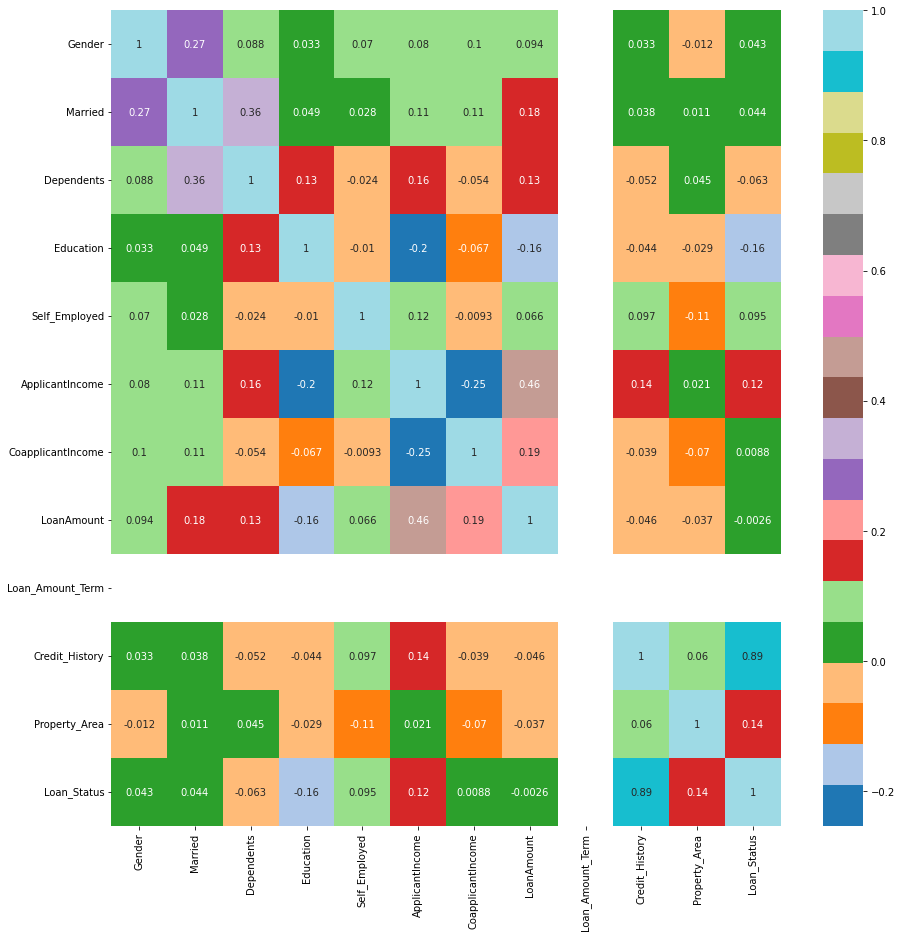

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_copy.corr(), annot=True, cmap="tab20")

In [ ]:
df_copy['Rejection_Reason'] = "NA"
df_copy.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Rejection_Reason
Loan_ID,,,,,,,,,,,,,
LP001015,1,1,0,0,0,5720,0.0,110.0,360.0,1,2,1,NA
LP001022,1,1,1,0,0,3076,1500.0,126.0,360.0,1,2,1,NA
LP001031,1,1,2,0,0,5000,1800.0,208.0,360.0,1,2,1,NA
LP001035,1,1,2,0,0,2340,2546.0,100.0,360.0,1,2,1,NA
LP001051,1,0,0,1,0,3276,0.0,78.0,360.0,1,2,1,NA


In [ ]:
approved = df_copy[df_copy['Loan_Status']==1]
approved.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Rejection_Reason
Loan_ID,,,,,,,,,,,,,
LP001015,1,1,0,0,0,5720,0.0,110.0,360.0,1,2,1,NA
LP001022,1,1,1,0,0,3076,1500.0,126.0,360.0,1,2,1,NA
LP001031,1,1,2,0,0,5000,1800.0,208.0,360.0,1,2,1,NA
LP001035,1,1,2,0,0,2340,2546.0,100.0,360.0,1,2,1,NA
LP001051,1,0,0,1,0,3276,0.0,78.0,360.0,1,2,1,NA


In [ ]:
df_0 = df_copy[(df_copy['Credit_History']==0) & (df_copy['Loan_Status']==0)]
df_0['Rejection_Reason'] = "Bad Credit History"
df_0.head()

<ipython-input-88-0285a29595dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0['Rejection_Reason'] = "Bad Credit History"


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Rejection_Reason
Loan_ID,,,,,,,,,,,,,
LP001056,1,1,2,1,0,3881,0.00,147.0,360.0,0,0,0,Bad Credit History
LP001094,1,1,2,0,0,8354,0.00,166.0,360.0,0,1,0,Bad Credit History
LP001153,1,0,0,0,0,0,6076.25,148.0,360.0,0,0,0,Bad Credit History
LP001203,1,0,0,0,0,3150,0.00,176.0,360.0,0,1,0,Bad Credit History
LP001313,1,0,0,0,0,2750,0.00,130.0,360.0,0,2,0,Bad Credit History


In [ ]:
df_1 = df_copy[(df_copy['Credit_History']==1) & (df_copy['Education']==1) & (df_copy['Loan_Status']==0)]
df_1['Rejection_Reason'] = "Low Education"
df_1.head()

<ipython-input-89-c3e72f47c085>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Rejection_Reason'] = "Low Education"


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Rejection_Reason
Loan_ID,,,,,,,,,,,,,
LP001270,1,1,3,1,1,8000,250.0,187.0,360.0,1,1,0,Low Education
LP001548,1,1,2,1,0,2687,0.0,50.0,360.0,1,0,0,Low Education
LP001607,0,0,0,1,0,0,1760.0,180.0,360.0,1,1,0,Low Education
LP001815,1,0,0,1,0,3276,0.0,90.0,360.0,1,1,0,Low Education
LP001881,1,1,0,1,0,7895,0.0,143.0,360.0,1,0,0,Low Education


In [ ]:
df_2 = df_copy[(df_copy['Credit_History']==1) & (df_copy['Education']==0) & (df_copy['Property_Area']==0) & (df_copy['Loan_Status']==0)]
df_2['Rejection_Reason'] = "Low Collateral Quality"
df_2.head()

<ipython-input-90-1e116a4c3965>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Rejection_Reason'] = "Low Collateral Quality"


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Rejection_Reason
Loan_ID,,,,,,,,,,,,,
LP001959,0,1,1,0,0,3564,0.0,79.0,360.0,1,0,0,Low Collateral Quality
LP002415,0,0,1,0,0,1850,4583.0,81.0,360.0,1,0,0,Low Collateral Quality


In [ ]:
df_3 = df_copy[(df_copy['Credit_History']==1) & (df_copy['Education']==0) & (df_copy['Property_Area']==2) & (df['Self_Employed']==0) & (df_copy['Loan_Status']==0)]
df_3['Rejection_Reason'] = "Not Self Employed"
df_3.head()

<ipython-input-91-1babb06b379a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3 = df_copy[(df_copy['Credit_History']==1) & (df_copy['Education']==0) & (df_copy['Property_Area']==2) & (df['Self_Employed']==0) & (df_copy['Loan_Status']==0)]


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Rejection_Reason
Loan_ID,,,,,,,,,,,,,


In [ ]:
df_4 = df_copy[(df_copy['Credit_History']==1) & (df_copy['Education']==0) & (df_copy['Property_Area']==1) & (df_copy['Self_Employed']==0) & (df_copy['Loan_Status']==0)]
df_4['Rejection_Reason'] = "Low Collateral Quality and Not Self Employed"
df_4.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Rejection_Reason
Loan_ID,,,,,,,,,,,,,


In [ ]:
df_5 = df_copy[(df_copy['Credit_History']==1) & (df_copy['Education']==0) & (df_copy['Property_Area']==1) & (df_copy['Self_Employed']==1) & (df_copy['Loan_Status']==0)]
df_5['Rejection_Reason'] = "Low Applicant Income"
df_5.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Rejection_Reason
Loan_ID,,,,,,,,,,,,,


In [ ]:
df_6 = df_copy[(df_copy['Credit_History']==1) & (df_copy['Education']==0) & (df_copy['Property_Area']==2) & (df_copy['Self_Employed']==1) & (df_copy['Loan_Status']==0)]
df_6['Rejection_Reason'] = "Low Applicant Income"
df_6.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Rejection_Reason
Loan_ID,,,,,,,,,,,,,


In [ ]:
df_analyzed = pd.concat([approved, df_0, df_1, df_2, df_3, df_4, df_5, df_6])
df_analyzed

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Rejection_Reason
Loan_ID,,,,,,,,,,,,,
LP001015,1,1,0,0,0,5720,0.0,110.0,360.0,1,2,1,NA
LP001022,1,1,1,0,0,3076,1500.0,126.0,360.0,1,2,1,NA
LP001031,1,1,2,0,0,5000,1800.0,208.0,360.0,1,2,1,NA
LP001035,1,1,2,0,0,2340,2546.0,100.0,360.0,1,2,1,NA
LP001051,1,0,0,1,0,3276,0.0,78.0,360.0,1,2,1,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP002605,1,0,0,1,0,3271,0.0,90.0,360.0,1,0,0,Low Education
LP002869,1,1,3,1,0,3522,0.0,81.0,360.0,1,0,0,Low Education
LP002954,1,1,2,1,0,3132,0.0,76.0,360.0,1,0,0,Low Education


In [ ]:
df_model = df_analyzed.copy()

df_analyzed['Gender'] = df_analyzed['Gender'].replace(0, "Female")
df_analyzed['Gender'] = df_analyzed['Gender'].replace(1, "Male")

df_analyzed['Married'] = df_analyzed['Married'].replace(0, "No")
df_analyzed['Married'] = df_analyzed['Married'].replace(1, "Yes")

df_analyzed['Dependents'] = df_analyzed['Dependents'].replace(0, "0")
df_analyzed['Dependents'] = df_analyzed['Dependents'].replace(1, "1")
df_analyzed['Dependents'] = df_analyzed['Dependents'].replace(2, "2")
df_analyzed['Dependents'] = df_analyzed['Dependents'].replace(3, "3+")

df_analyzed['Education'] = df_analyzed['Education'].replace(0, "Graduate")
df_analyzed['Education'] = df_analyzed['Education'].replace(1, "Not Graduate")

df_analyzed['Self_Employed'] = df_analyzed['Self_Employed'].replace(0, "No")
df_analyzed['Self_Employed'] = df_analyzed['Self_Employed'].replace(1, "Yes")

df_analyzed['Credit_History'] = df_analyzed['Credit_History'].replace(0, "No")
df_analyzed['Credit_History'] = df_analyzed['Credit_History'].replace(1, "Yes")

df_analyzed['Property_Area'] = df_analyzed['Property_Area'].replace(0, "Rural")
df_analyzed['Property_Area'] = df_analyzed['Property_Area'].replace(1, "Semiurban")
df_analyzed['Property_Area'] = df_analyzed['Property_Area'].replace(2, "Urban")

df_analyzed['Loan_Status'] = df_analyzed['Loan_Status'].replace(0, "No")
df_analyzed['Loan_Status'] = df_analyzed['Loan_Status'].replace(1, "Yes")

In [ ]:
df_analyzed.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Rejection_Reason
Loan_ID,,,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,Yes,Urban,Yes,NA
LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,Yes,Urban,Yes,NA
LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,Yes,Urban,Yes,NA
LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,Yes,Urban,Yes,NA
LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,Yes,Urban,Yes,NA


In [ ]:
df_model.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Rejection_Reason
Loan_ID,,,,,,,,,,,,,
LP001015,1,1,0,0,0,5720,0.0,110.0,360.0,1,2,1,NA
LP001022,1,1,1,0,0,3076,1500.0,126.0,360.0,1,2,1,NA
LP001031,1,1,2,0,0,5000,1800.0,208.0,360.0,1,2,1,NA
LP001035,1,1,2,0,0,2340,2546.0,100.0,360.0,1,2,1,NA
LP001051,1,0,0,1,0,3276,0.0,78.0,360.0,1,2,1,NA


In [ ]:
df_model['Rejection_Reason'].value_counts()

NA                        296
Bad Credit History         59
Low Education              10
Low Collateral Quality      2
Name: Rejection_Reason, dtype: int64

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df_model['Rejection_Reason']= label_encoder.fit_transform(df_model['Rejection_Reason'])

df_model['Rejection_Reason'].unique()

array([3, 0, 2, 1])

In [ ]:
df_model.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Rejection_Reason
Loan_ID,,,,,,,,,,,,,
LP001015,1,1,0,0,0,5720,0.0,110.0,360.0,1,2,1,3
LP001022,1,1,1,0,0,3076,1500.0,126.0,360.0,1,2,1,3
LP001031,1,1,2,0,0,5000,1800.0,208.0,360.0,1,2,1,3
LP001035,1,1,2,0,0,2340,2546.0,100.0,360.0,1,2,1,3
LP001051,1,0,0,1,0,3276,0.0,78.0,360.0,1,2,1,3


In [ ]:
x = df_model.drop('Rejection_Reason', axis=1)
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001015,1,1,0,0,0,5720,0.0,110.0,360.0,1,2,1
LP001022,1,1,1,0,0,3076,1500.0,126.0,360.0,1,2,1
LP001031,1,1,2,0,0,5000,1800.0,208.0,360.0,1,2,1
LP001035,1,1,2,0,0,2340,2546.0,100.0,360.0,1,2,1
LP001051,1,0,0,1,0,3276,0.0,78.0,360.0,1,2,1


In [ ]:
y = df_model['Rejection_Reason']
y.head()

Loan_ID
LP001015    3
LP001022    3
LP001031    3
LP001035    3
LP001051    3
Name: Rejection_Reason, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: ", accuracy*100, "%")

Accuracy:  100.0 %
